# Trabalho No. 1

- Aluno: Guilherme Lisboa de Oliveira (GRR20170414)

```{admonition} Questões

Questões: 1, 7, 8, 9, 14 e 15 na Seção I.10 Exercícios em
http://leg.ufpr.br/~lucambio/MSM/MSM01.htm

```

## Questão 1

No gráfico boxplot, o extremo superior é sempre um outlier?

Não, uma observação apenas será considerada um outlier caso ela seja maior que $F_U + 1,5 d_F$ ou menor que $F_L - 1,5 d_F$

## Questão 7

Faça o histograma para a variável de milhagem (quilometragem) do Exemplo I.2, o exemplo dos carros. Faça o mesmo para os três grupos (EUA, Japão e Europa). Você obtém uma conclusão semelhante à do boxplot para esses dados?


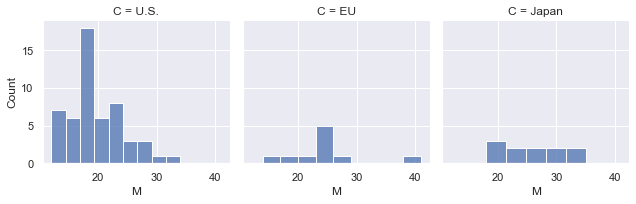

In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme("notebook")
sns.set(rc={"figure.figsize": [10, 6]})

dados_carros = pd.read_table("./dados/CarData.txt", sep="\s+")
sedes = {1: "U.S.", 2: "Japan", 3: "EU"}
dados_carros.C.replace(sedes, inplace=True)

g = sns.FacetGrid(dados_carros, col="C")
g.map(sns.histplot, "M");


Fica claro que os carros japoneses são, de maneira geral, mais eficientes que os norte americanos. Pelos histogramas, notamos que não há modelos japones com consumo pior que 20 milhas/galão, enquanto existem vários modelos abaixo de 20 milhas/galão de marcas estaunidenses. Já a comparação entre modelos europeus fica um pouco confusa, isso porque existem modelos abaixo de 20 milhas/galão, mas existe uma concentração em modelos entre 20 e 30 milhas/galão, o que pode confundir com a concentração de modelos japones na faixa de 20 milhas/galão.

A detecção de oulier é mais explícita no boxplot. Nota-se no histograma dos modelos europeus que existe uma barra separada das demais (VW-Rabbit Golf Diesel), apontando a observação como possível outlier. Entretanto no histograma dos carros de marcars americanas não fica claro se existem ouliers.

Enfim, para visualizar a distribuição do consumo em função do país de origem da sede, os histogramas me parecem mais adequados. Já caso o objetivo seja comparar o consumo e/ou detectar ouliers, os boxplots facilitaram visualizar principalmente a diferença entre os modelos japoneses e europeus e a presença de outlier nos modelos americanos.

## Questão 8

Use algum critério de seleção de largura de banda para calcular a largura de banda h escolhida de forma ótima para a variável Diagonal das cédulas. Seria melhor ter uma largura de banda para os dois grupos?


In [2]:
import numpy as np
notas = pd.read_csv('./dados/banknotes.csv')

# métodos da metodologia de suavização (Härdle, Müller, Sperlich, & Werwatz, 2004)
banda_otima = lambda n : (24 * np.sqrt(np.pi) / n) ** (1/3)

notas_banda_diagonal = banda_otima(len(notas.index))

notas_banda_diagonal

0.5969235696880233

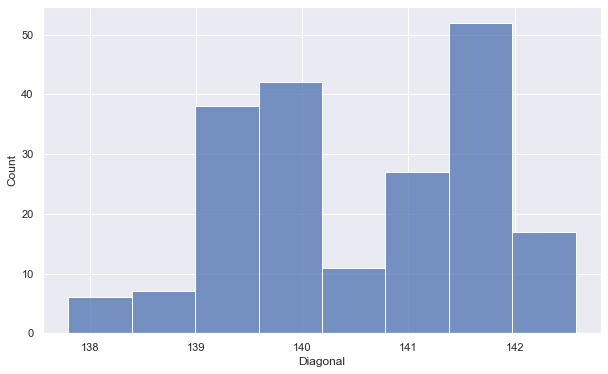

In [3]:
sns.histplot(data=notas, x='Diagonal', binwidth=notas_banda_diagonal);

## Questão 9

Faça um gráfico de coordenadas paralelas para os dados dos carros (Exemplo I.2).

In [20]:
import plotly.express as px

dados_carros = pd.read_table("./dados/CarData.txt", sep="\s+")

colunas_linhas_paralelas = [
    coluna for coluna in dados_carros.columns if coluna not in ["C", "Model"]
]

fig = px.parallel_coordinates(
    dados_carros,
    color="C",
    dimensions=colunas_linhas_paralelas,
    #color_continuous_scale=px.colors.diverging.RdYlBu,
)

fig.write_image("./imagens/trabalho1_q9.png")

![Quadro](./imagens/trabalho1_q9.png)

## Questão 14

Descreva os dados do desemprego (leitura abaixo) que contêm taxas de desemprego de todos os estados federais alemães usando várias técnicas descritivas.

```{code-block} r

# Taxas de desemprego em todos os estados federais da Alemanha em setembro de 1999.
dados = read.table("http://leg.ufpr.br/~lucambio/MSM/desemprego.txt", header = TRUE, sep = " ")
head(dados)
##                   Estado Taxa
## 1     Schleswig-Holstein  8.7
## 2                Hamburg  9.8
## 3 Mecklenburg-Vorpommern 17.3
## 4          Niedersachsen  9.8
## 5                 Bremen 13.9
## 6    Nordrhein-Westfalen  9.8

```


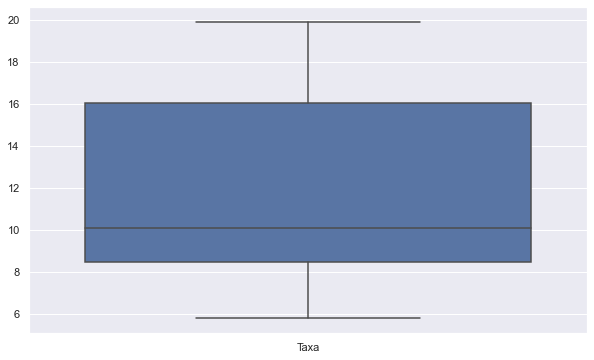

In [5]:
dados_desemprego = pd.read_table('./dados/desemprego.txt', sep='\s+')

sns.boxplot(data=dados_desemprego);

Pelo boxplot, vemos que não há outliers nos dados de desemprego. Além disso, notamos que há uma concentração no segundo quartil (aproximadamente na marca de 9%). Para entender melhor em quais faixas estão distribuídas as observações, usamos um histograma:

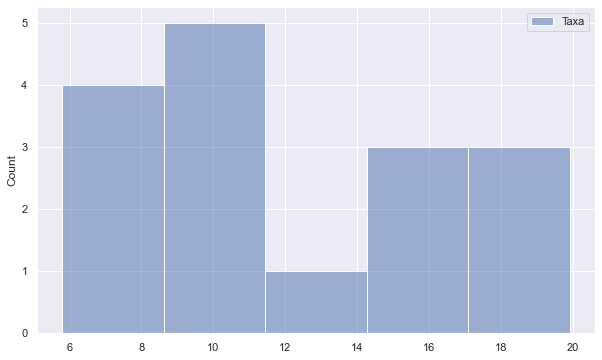

In [6]:
sns.histplot(data=dados_desemprego);

Pelo histograma, vemos que há dois perfis de cidades em relação ao desemprego. Há um grupo com índices relativamente mais baixos, entre 6% e 10%. Já outro grupo com índices altos, entre 14% e 20%. Considerando o contexto da pesquisa, a distribuição mostra os efeitos da separação da alemanha, mesmo uma década após a reunificação.

Apenas por curiosidade, mesmo nos anos 2010 ainda há diferenças entre as taxas de emprego entre as regiões: https://www.pewresearch.org/fact-tank/2019/11/06/east-germany-has-narrowed-economic-gap-with-west-germany-since-fall-of-communism-but-still-lags/


## Questão 15

Usando dados anuais da população (leitura abaixo) e gerar:

1. Um boxplot, escolha uma das variáveis.
2. Uma curva de Andrew escolhendo dez pontos de dados.
3. Um gráfico de dispersão.
4. Um histograma, escolha uma das variáveis.
   
Os dados mostram taxas populacionais médias anuais para o antigo território da República Federal da Alemanha, inclunindo Berlim-West, dados em 1.000 habitantes.

```{code-block} r

# Taxas de desemprego em todos os estados federais da Alemanha em setembro de 1999.
dados = read.table("http://leg.ufpr.br/~lucambio/MSM/population.txt", header = TRUE, sep = " ")
head(dados)
##   Year Inhabitants Unemployed
## 1 1960       55433        271
## 2 1961       56158        181
## 3 1962       56837        155
## 4 1963       57389        186
## 5 1964       57971        169
## 6 1965       58619        147

```
O que esses gráficos dizem sobre os dados e a estrutura deles?

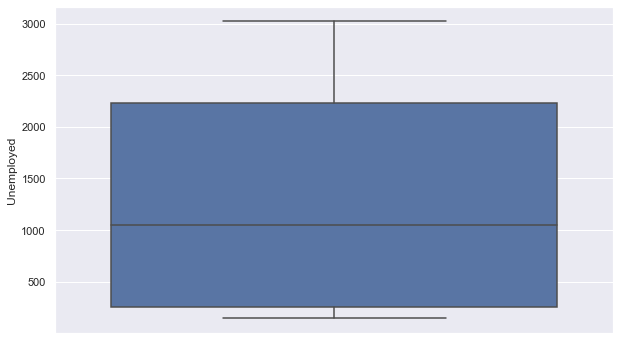

In [7]:
dados_populacao = pd.read_table('./dados/population.txt', sep='\s+')

sns.boxplot(data=dados_populacao, y='Unemployed');

Pelo boxplot vemos que a mediana é 1000, não há nenhum ano com um registro de desemprego considerado outlier e que há uma concentração de observações em torno de 200 a 300.

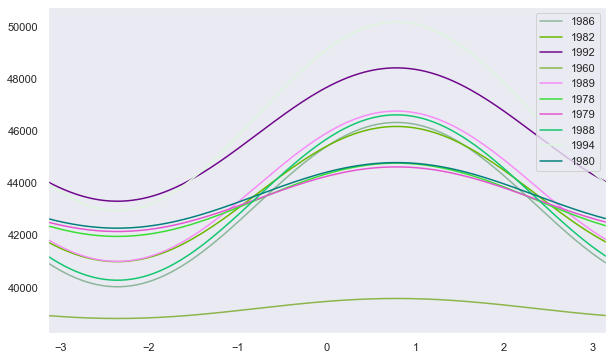

In [8]:
pd.plotting.andrews_curves(dados_populacao.sample(n=10), 'Year');

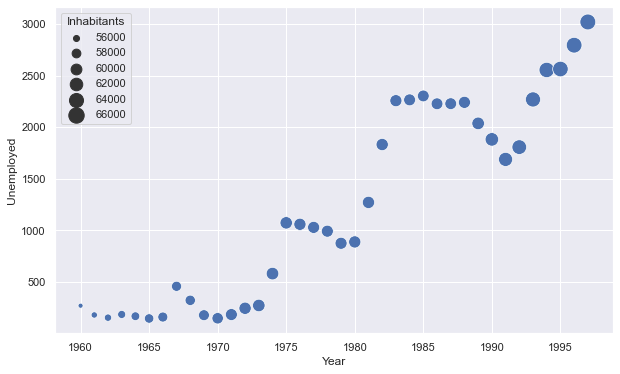

In [9]:
sns.scatterplot(data=dados_populacao, x='Year', y='Unemployed', size='Inhabitants', sizes=(25, 250));

Já o gráfico de disperção mostra a variação ao passar dos anos, com períodos de alta no desemprego (1966, 1974 a 75, começos dos anos 80 e logo após a reunificação). A queda no desempro mais clara aconteceu na segunda metade dos anos 80 até o ínicio dos 90.

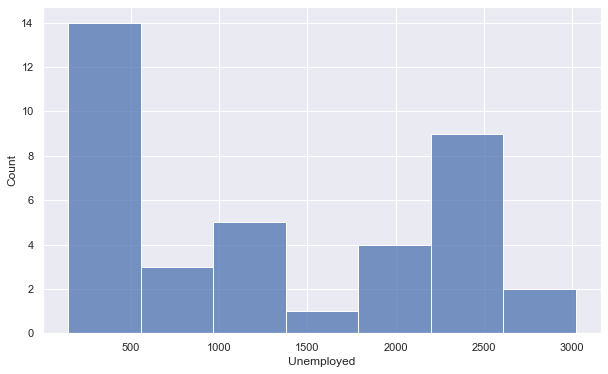

In [10]:
sns.histplot(data=dados_populacao, x='Unemployed');

Como podemos observar no boxplot, o histograma também aponta uma concentração de observações abaixo de 500, entretanto vemos que a faixa de 1500 teve poucas observações, reflexo das variações vistas no gráfico de disperção, quando o Alemanha alternava períodos de baixo desemprego (observações < 1000) com subidas bastante íngremes nas taxas em momentos de instabilidade política (observações > 2000).